In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
constructors_df = pd.read_csv('constructors.csv')
drivers_df = pd.read_csv('drivers.csv')
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')

In [3]:
constructors_df

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [4]:
constructors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [5]:
drivers_df

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


In [6]:
drivers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [7]:
races_df

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,29/03/09,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,05/04/09,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,19/04/09,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,26/04/09,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,10/05/09,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1074,1092,2022,18,22,Japanese Grand Prix,09/10/22,5:00:00,http://en.wikipedia.org/wiki/2022_Japanese_Gra...
1075,1093,2022,19,69,United States Grand Prix,23/10/22,19:00:00,http://en.wikipedia.org/wiki/2022_United_State...
1076,1094,2022,20,32,Mexico City Grand Prix,30/10/22,20:00:00,http://en.wikipedia.org/wiki/2022_Mexican_Gran...
1077,1095,2022,21,18,Brazilian Grand Prix,13/11/22,18:00:00,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...


In [8]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1079 non-null   int64 
 1   year       1079 non-null   int64 
 2   round      1079 non-null   int64 
 3   circuitId  1079 non-null   int64 
 4   name       1079 non-null   object
 5   date       1079 non-null   object
 6   time       1079 non-null   object
 7   url        1079 non-null   object
dtypes: int64(4), object(4)
memory usage: 67.6+ KB


In [9]:
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25455,25461,1076,849,3,6,18,16,16,16,0.0,57,\N,\N,49,18,1:23.882,226.518,11
25456,25462,1076,4,214,14,10,17,17,17,0.0,57,\N,\N,57,2,1:20.846,235.024,11
25457,25463,1076,830,9,1,2,\N,R,18,0.0,38,\N,\N,37,6,1:21.677,232.633,9
25458,25464,1076,20,117,5,17,\N,R,19,0.0,22,\N,\N,17,19,1:25.189,223.042,3


In [10]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25460 entries, 0 to 25459
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25460 non-null  int64  
 1   raceId           25460 non-null  int64  
 2   driverId         25460 non-null  int64  
 3   constructorId    25460 non-null  int64  
 4   number           25460 non-null  object 
 5   grid             25460 non-null  int64  
 6   position         25460 non-null  object 
 7   positionText     25460 non-null  object 
 8   positionOrder    25460 non-null  int64  
 9   points           25460 non-null  float64
 10  laps             25460 non-null  int64  
 11  time             25460 non-null  object 
 12  milliseconds     25460 non-null  object 
 13  fastestLap       25460 non-null  object 
 14  rank             25460 non-null  object 
 15  fastestLapTime   25460 non-null  object 
 16  fastestLapSpeed  25460 non-null  object 
 17  statusId    

In [11]:
df = pd.merge(results_df, races_df[['raceId', 'year', 'name', 'round']], on = 'raceId', how = 'left')
df = pd.merge(df, drivers_df[['driverId', 'driverRef', 'nationality']], on = 'driverId', how = 'left')
df = pd.merge(df, constructors_df[['constructorId', 'name', 'nationality']], on = 'constructorId', how = 'left')

In [12]:
df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,18,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,2,18,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,3,18,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,4,18,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,5,18,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25455,25461,1076,849,3,6,18,16,16,16,0.0,...,1:23.882,226.518,11,2022,Australian Grand Prix,3,latifi,Canadian,Williams,British
25456,25462,1076,4,214,14,10,17,17,17,0.0,...,1:20.846,235.024,11,2022,Australian Grand Prix,3,alonso,Spanish,Alpine F1 Team,French
25457,25463,1076,830,9,1,2,\N,R,18,0.0,...,1:21.677,232.633,9,2022,Australian Grand Prix,3,max_verstappen,Dutch,Red Bull,Austrian
25458,25464,1076,20,117,5,17,\N,R,19,0.0,...,1:25.189,223.042,3,2022,Australian Grand Prix,3,vettel,German,Aston Martin,British


In [13]:
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'name_x', 'round', 'driverRef',
       'nationality_x', 'name_y', 'nationality_y'],
      dtype='object')

In [14]:
df = df.drop(columns = ['number', 'position', 'positionText', 'laps', 'fastestLap', 'statusId', 'resultId', 'raceId', 'driverId', 'constructorId'])
df

,grid,positionOrder,points,time,milliseconds,rank,fastestLapTime,fastestLapSpeed,year,name_x,round,driverRef,nationality_x,name_y,nationality_y
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25455,18,16,0.0,\N,\N,18,1:23.882,226.518,2022,Australian Grand Prix,3,latifi,Canadian,Williams,British
25456,10,17,0.0,\N,\N,2,1:20.846,235.024,2022,Australian Grand Prix,3,alonso,Spanish,Alpine F1 Team,French
25457,2,18,0.0,\N,\N,6,1:21.677,232.633,2022,Australian Grand Prix,3,max_verstappen,Dutch,Red Bull,Austrian
25458,17,19,0.0,\N,\N,19,1:25.189,223.042,2022,Australian Grand Prix,3,vettel,German,Aston Martin,British


In [15]:
df = df.rename(columns = {'rank':'fastest_lap_rank', 'name_x':'gp_name', 'nationality_x':'driver_nationality', 'name_y':'constructor_name', 'nationality_y':'constructor_nationality'})
df

,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,year,gp_name,round,driverRef,driver_nationality,constructor_name,constructor_nationality
0,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,2008,Australian Grand Prix,1,hamilton,British,McLaren,British
1,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,2008,Australian Grand Prix,1,heidfeld,German,BMW Sauber,German
2,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,2008,Australian Grand Prix,1,rosberg,German,Williams,British
3,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,2008,Australian Grand Prix,1,alonso,Spanish,Renault,French
4,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,2008,Australian Grand Prix,1,kovalainen,Finnish,McLaren,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25455,18,16,0.0,\N,\N,18,1:23.882,226.518,2022,Australian Grand Prix,3,latifi,Canadian,Williams,British
25456,10,17,0.0,\N,\N,2,1:20.846,235.024,2022,Australian Grand Prix,3,alonso,Spanish,Alpine F1 Team,French
25457,2,18,0.0,\N,\N,6,1:21.677,232.633,2022,Australian Grand Prix,3,max_verstappen,Dutch,Red Bull,Austrian
25458,17,19,0.0,\N,\N,19,1:25.189,223.042,2022,Australian Grand Prix,3,vettel,German,Aston Martin,British


In [16]:
df.columns

Index(['grid', 'positionOrder', 'points', 'time', 'milliseconds',
       'fastest_lap_rank', 'fastestLapTime', 'fastestLapSpeed', 'year',
       'gp_name', 'round', 'driverRef', 'driver_nationality',
       'constructor_name', 'constructor_nationality'],
      dtype='object')

In [17]:
df = df[['year', 'gp_name', 'round', 'driverRef', 'constructor_name', 'grid', 'positionOrder', 'points', 'time', 'milliseconds', 'fastest_lap_rank', 'fastestLapTime', 'fastestLapSpeed', 'driver_nationality', 'constructor_nationality']]
df

,year,gp_name,round,driverRef,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25455,2022,Australian Grand Prix,3,latifi,Williams,18,16,0.0,\N,\N,18,1:23.882,226.518,Canadian,British
25456,2022,Australian Grand Prix,3,alonso,Alpine F1 Team,10,17,0.0,\N,\N,2,1:20.846,235.024,Spanish,French
25457,2022,Australian Grand Prix,3,max_verstappen,Red Bull,2,18,0.0,\N,\N,6,1:21.677,232.633,Dutch,Austrian
25458,2022,Australian Grand Prix,3,vettel,Aston Martin,17,19,0.0,\N,\N,19,1:25.189,223.042,German,British


In [18]:
df = df.loc[df['year'] != 2022]
df

,year,gp_name,round,driverRef,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2008,Australian Grand Prix,1,hamilton,McLaren,1,1,10.0,1:34:50.616,5690616,2,1:27.452,218.300,British,British
1,2008,Australian Grand Prix,1,heidfeld,BMW Sauber,5,2,8.0,+5.478,5696094,3,1:27.739,217.586,German,German
2,2008,Australian Grand Prix,1,rosberg,Williams,7,3,6.0,+8.163,5698779,5,1:28.090,216.719,German,British
3,2008,Australian Grand Prix,1,alonso,Renault,11,4,5.0,+17.181,5707797,7,1:28.603,215.464,Spanish,French
4,2008,Australian Grand Prix,1,kovalainen,McLaren,3,5,4.0,+18.014,5708630,1,1:27.418,218.385,Finnish,British
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,2021,Abu Dhabi Grand Prix,22,latifi,Williams,16,16,0.0,\N,\N,15,1:29.293,212.912,Canadian,British
25396,2021,Abu Dhabi Grand Prix,22,giovinazzi,Alfa Romeo,14,17,0.0,\N,\N,16,1:29.442,212.557,Italian,Swiss
25397,2021,Abu Dhabi Grand Prix,22,russell,Williams,17,18,0.0,\N,\N,19,1:30.647,209.732,British,British
25398,2021,Abu Dhabi Grand Prix,22,raikkonen,Alfa Romeo,18,19,0.0,\N,\N,18,1:29.698,211.951,Finnish,Swiss


In [19]:
df = df.sort_values(by = ['year', 'round', 'positionOrder'], ascending = [False, True, True])
df

,year,gp_name,round,driverRef,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
24960,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897,4,1:34.015,207.235,British,German
24961,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,+0.745,5524642,2,1:33.228,208.984,Dutch,Austrian
24962,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,+37.383,5561280,1,1:32.090,211.566,Finnish,German
24963,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,+46.466,5570363,6,1:34.396,206.398,British,British
24964,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,+52.047,5575944,3,1:33.970,207.334,Mexican,Austrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,\N,\N,\N,\N,\N,Italian,Swiss
20172,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,\N,\N,\N,\N,\N,French,French
20173,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,\N,\N,\N,\N,\N,Thai,Italian
20174,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,\N,\N,\N,\N,\N,German,Italian


In [20]:
df = df.replace('\\N', np.nan)
df

,year,gp_name,round,driverRef,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
24960,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897,4,1:34.015,207.235,British,German
24961,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,+0.745,5524642,2,1:33.228,208.984,Dutch,Austrian
24962,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,+37.383,5561280,1,1:32.090,211.566,Finnish,German
24963,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,+46.466,5570363,6,1:34.396,206.398,British,British
24964,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,+52.047,5575944,3,1:33.970,207.334,Mexican,Austrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20171,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,NaN,NaN,NaN,NaN,NaN,Italian,Swiss
20172,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,NaN,NaN,NaN,NaN,NaN,French,French
20173,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,NaN,NaN,NaN,NaN,NaN,Thai,Italian
20174,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,NaN,NaN,NaN,NaN,NaN,German,Italian


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25400 entries, 24960 to 20175
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25400 non-null  int64  
 1   gp_name                  25400 non-null  object 
 2   round                    25400 non-null  int64  
 3   driverRef                25400 non-null  object 
 4   constructor_name         25400 non-null  object 
 5   grid                     25400 non-null  int64  
 6   positionOrder            25400 non-null  int64  
 7   points                   25400 non-null  float64
 8   time                     6809 non-null   object 
 9   milliseconds             6808 non-null   object 
 10  fastest_lap_rank         7151 non-null   object 
 11  fastestLapTime           6953 non-null   object 
 12  fastestLapSpeed          6953 non-null   object 
 13  driver_nationality       25400 non-null  object 
 14  constructor_nation

In [22]:
df['fastestLapSpeed'] = df['fastestLapSpeed'].astype(float)
df['fastest_lap_rank'] = df['fastest_lap_rank'].astype(float)
df['milliseconds'] = df['milliseconds'].astype(float)

In [23]:
df.reset_index(drop = True, inplace = True)

In [24]:
df

,year,gp_name,round,driverRef,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897.0,4.0,1:34.015,207.235,British,German
1,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,+0.745,5524642.0,2.0,1:33.228,208.984,Dutch,Austrian
2,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,+37.383,5561280.0,1.0,1:32.090,211.566,Finnish,German
3,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,+46.466,5570363.0,6.0,1:34.396,206.398,British,British
4,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,+52.047,5575944.0,3.0,1:33.970,207.334,Mexican,Austrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,1950,Italian Grand Prix,7,sanesi,Alfa Romeo,4,23,0.0,NaN,NaN,NaN,NaN,NaN,Italian,Swiss
25396,1950,Italian Grand Prix,7,manzon,Simca,10,24,0.0,NaN,NaN,NaN,NaN,NaN,French,French
25397,1950,Italian Grand Prix,7,bira,Maserati,15,25,0.0,NaN,NaN,NaN,NaN,NaN,Thai,Italian
25398,1950,Italian Grand Prix,7,pietsch,Maserati,27,26,0.0,NaN,NaN,NaN,NaN,NaN,German,Italian


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25400 entries, 0 to 25399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     25400 non-null  int64  
 1   gp_name                  25400 non-null  object 
 2   round                    25400 non-null  int64  
 3   driverRef                25400 non-null  object 
 4   constructor_name         25400 non-null  object 
 5   grid                     25400 non-null  int64  
 6   positionOrder            25400 non-null  int64  
 7   points                   25400 non-null  float64
 8   time                     6809 non-null   object 
 9   milliseconds             6808 non-null   float64
 10  fastest_lap_rank         7151 non-null   float64
 11  fastestLapTime           6953 non-null   object 
 12  fastestLapSpeed          6953 non-null   float64
 13  driver_nationality       25400 non-null  object 
 14  constructor_nationalit

In [26]:
sns.set_palette('Set3')
plt.rcParams['figure.figsize'] = 10,6

In [27]:
driver_winner = df.loc[df['positionOrder'] == 1].groupby('driverRef')['positionOrder'].count().sort_values(ascending = False).reset_index()
driver_winner

,driverRef,positionOrder
0,hamilton,103
1,michael_schumacher,91
2,vettel,53
3,prost,51
4,senna,41
...,...,...
106,cevert,1
107,bryan,1
108,brambilla,1
109,ireland,1


Text(0, 0.5, 'Driver Name')

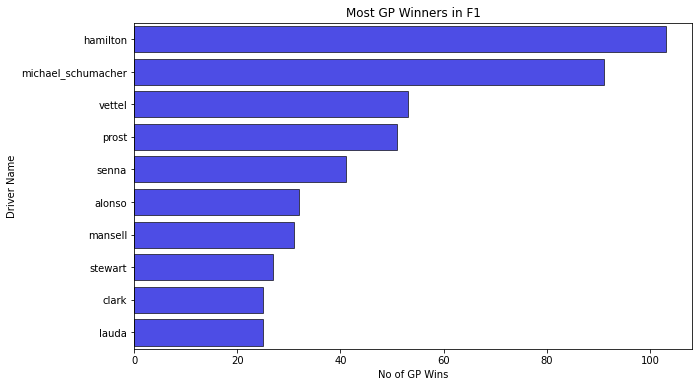

In [28]:
# top 10 drivers of all time

top10_drivers = driver_winner.head(10)

sns.barplot(data = top10_drivers, x = 'positionOrder', y = 'driverRef', color = 'blue', alpha = 0.8, linewidth = 0.8, edgecolor = 'black')
plt.title('Most GP Winners in F1')
plt.xlabel('No of GP Wins')
plt.ylabel('Driver Name')

In [29]:
constructor_winner = df.loc[df['positionOrder'] == 1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending = False).reset_index()
constructor_winner

,constructor_name,positionOrder
0,Ferrari,239
1,McLaren,179
2,Mercedes,124
3,Williams,114
4,Red Bull,75
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Brabham,23
9,Tyrrell,23


Text(0, 0.5, 'Constructor Name')

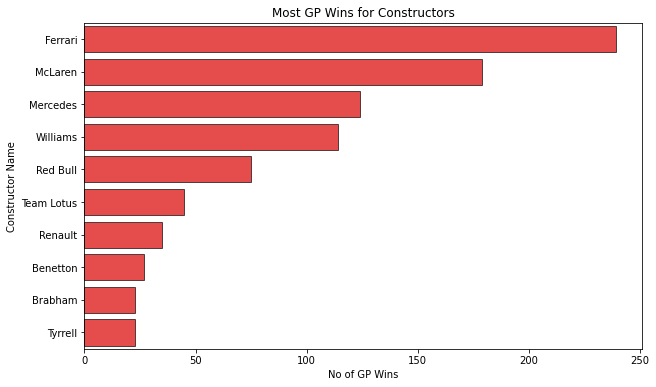

In [30]:
# top 10 constructor of all time

top10_constructor = constructor_winner.head(10)

sns.barplot(data = top10_constructor, x = 'positionOrder', y = 'constructor_name', color = 'red', alpha = 0.8, linewidth = 0.8, edgecolor = 'black')
plt.title('Most GP Wins for Constructors')
plt.xlabel('No of GP Wins')
plt.ylabel('Constructor Name')

Text(0, 0.5, 'Finish Place')

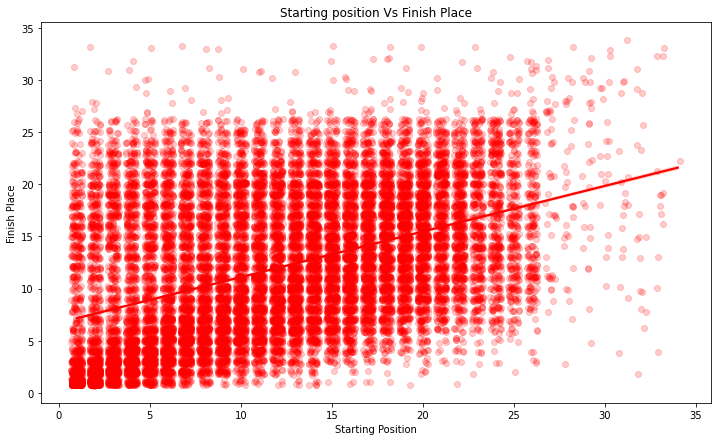

In [31]:
df_no_zero = df[df['grid'] != 0]

plt.figure(figsize = [12,7])
sns.regplot(data = df_no_zero, y = 'positionOrder', x = 'grid', color = 'red', x_jitter = 0.3, y_jitter = 0.3, scatter_kws = {'alpha' : 1/5})
plt.title('Starting position Vs Finish Place')
plt.xlabel('Starting Position')
plt.ylabel('Finish Place')

In [32]:
df_new_era = df.loc[df['year'] >= 2004]
df_group_speed = df_new_era.groupby(['gp_name', 'year'])['fastestLapSpeed'].mean().to_frame().reset_index()
df_group_speed

,gp_name,year,fastestLapSpeed
0,70th Anniversary Grand Prix,2020,234.248250
1,Abu Dhabi Grand Prix,2009,198.041100
2,Abu Dhabi Grand Prix,2010,193.559045
3,Abu Dhabi Grand Prix,2011,189.779522
4,Abu Dhabi Grand Prix,2012,187.682739
...,...,...,...
339,United States Grand Prix,2016,191.745143
340,United States Grand Prix,2017,197.839400
341,United States Grand Prix,2018,199.424944
342,United States Grand Prix,2019,199.076600


Text(0.5, 0.98, 'Average speed amongst all teams during the fastest laps as individual GPs')

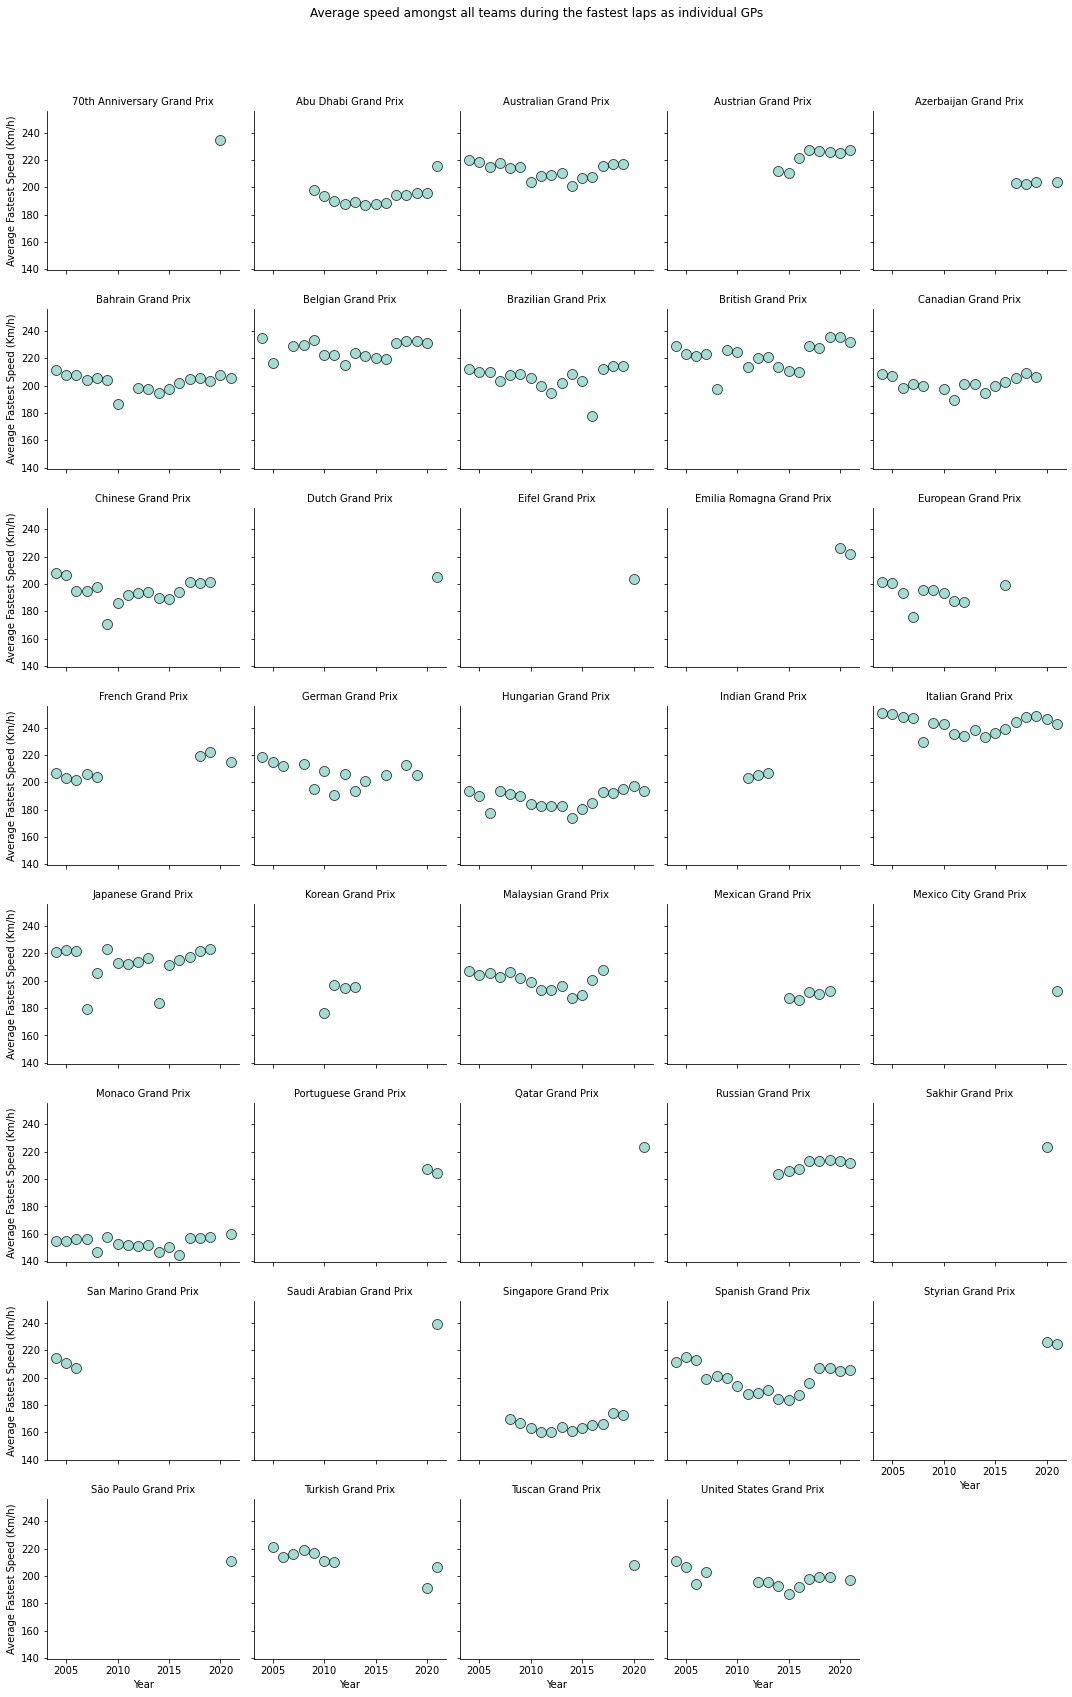

In [33]:
g = sns.FacetGrid(data = df_group_speed, col = 'gp_name', col_wrap = 5)
g.map(plt.scatter, 'year', 'fastestLapSpeed', alpha = 0.8, linewidth = 0.8, edgecolor = 'black', s = 100)
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels("Average Fastest Speed (Km/h)")
plt.subplots_adjust(top = 0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest laps as individual GPs')

In [34]:
GP_2021_df = df.loc[df['year'] == 2021]
GP_2021_df

,year,gp_name,round,driverRef,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2021,Bahrain Grand Prix,1,hamilton,Mercedes,2,1,25.0,1:32:03.897,5523897.0,4.0,1:34.015,207.235,British,German
1,2021,Bahrain Grand Prix,1,max_verstappen,Red Bull,1,2,18.0,+0.745,5524642.0,2.0,1:33.228,208.984,Dutch,Austrian
2,2021,Bahrain Grand Prix,1,bottas,Mercedes,3,3,16.0,+37.383,5561280.0,1.0,1:32.090,211.566,Finnish,German
3,2021,Bahrain Grand Prix,1,norris,McLaren,7,4,12.0,+46.466,5570363.0,6.0,1:34.396,206.398,British,British
4,2021,Bahrain Grand Prix,1,perez,Red Bull,0,5,10.0,+52.047,5575944.0,3.0,1:33.970,207.334,Mexican,Austrian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2021,Abu Dhabi Grand Prix,22,latifi,Williams,16,16,0.0,NaN,NaN,15.0,1:29.293,212.912,Canadian,British
436,2021,Abu Dhabi Grand Prix,22,giovinazzi,Alfa Romeo,14,17,0.0,NaN,NaN,16.0,1:29.442,212.557,Italian,Swiss
437,2021,Abu Dhabi Grand Prix,22,russell,Williams,17,18,0.0,NaN,NaN,19.0,1:30.647,209.732,British,British
438,2021,Abu Dhabi Grand Prix,22,raikkonen,Alfa Romeo,18,19,0.0,NaN,NaN,18.0,1:29.698,211.951,Finnish,Swiss


In [35]:
# 2021 gp podium finishers

GP_2021_df.groupby('round').apply(lambda x: x[['gp_name', 'positionOrder', 'driverRef', 'constructor_name', 'points', 'grid']].nsmallest(3, 'positionOrder'))

gp_name  positionOrder       driverRef  \
round                                                                 
1     0           Bahrain Grand Prix              1        hamilton   
      1           Bahrain Grand Prix              2  max_verstappen   
      2           Bahrain Grand Prix              3          bottas   
2     20   Emilia Romagna Grand Prix              1  max_verstappen   
      21   Emilia Romagna Grand Prix              2        hamilton   
...                              ...            ...             ...   
21    401   Saudi Arabian Grand Prix              2  max_verstappen   
      402   Saudi Arabian Grand Prix              3          bottas   
22    420       Abu Dhabi Grand Prix              1  max_verstappen   
      421       Abu Dhabi Grand Prix              2        hamilton   
      422       Abu Dhabi Grand Prix              3           sainz   

          constructor_name  points  grid  
round                                     
1     0           Mercedes    25.0     2  
      1           Red Bull    18.0     1  
      2           Mercedes    16.0     3  
2     20          Red Bull    25.0     3  
      21          Mercedes    19.0     1  
...                    ...     ...   ...  
21    401         Red Bull    18.0     3  
      402         Mercedes    15.0     2  
22    420         Red Bull    26.0     1  
      421         Mercedes    18.0     2  
      422          Ferrari    15.0     5  

[66 rows x 6 columns]

In [36]:
# most wins by drivers in 2021

filt = GP_2021_df['positionOrder'] == 1
most_wins = GP_2021_df.loc[filt].groupby('driverRef').size().reset_index().rename(columns = {0 : 'No of Wins'}).sort_values('No of Wins', ascending = False)

Text(0.5, 0, 'Driver Name')

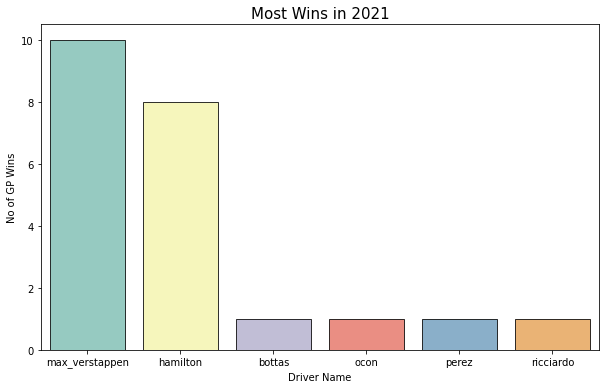

In [37]:
sns.barplot(data = most_wins, x = 'driverRef', y = 'No of Wins', linewidth = 0.8, edgecolor = 'black')
plt.title('Most Wins in 2021', size = 15)
plt.ylabel('No of GP Wins')
plt.xlabel('Driver Name')

In [38]:
# most wins by constructors in 2021

filt = GP_2021_df['positionOrder'] == 1
most_wins_cons = GP_2021_df.loc[filt].groupby('constructor_name').size().reset_index().rename(columns = {0 : 'No of Wins'}).sort_values('No of Wins', ascending = False)

Text(0.5, 0, 'Constructor Name')

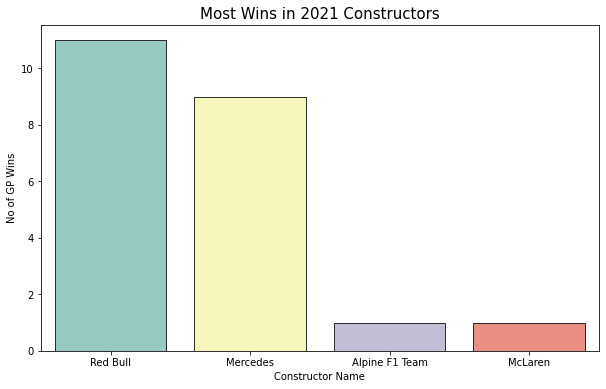

In [39]:
sns.barplot(data = most_wins_cons, x = 'constructor_name', y = 'No of Wins', linewidth = 0.8, edgecolor = 'black')
plt.title('Most Wins in 2021 Constructors', size = 15)
plt.ylabel('No of GP Wins')
plt.xlabel('Constructor Name')

In [40]:
# most points by drivers in 2021

most_points = GP_2021_df.groupby('driverRef')['points'].sum().reset_index().sort_values('points', ascending = False)

Text(0, 0.5, 'Driver Name')

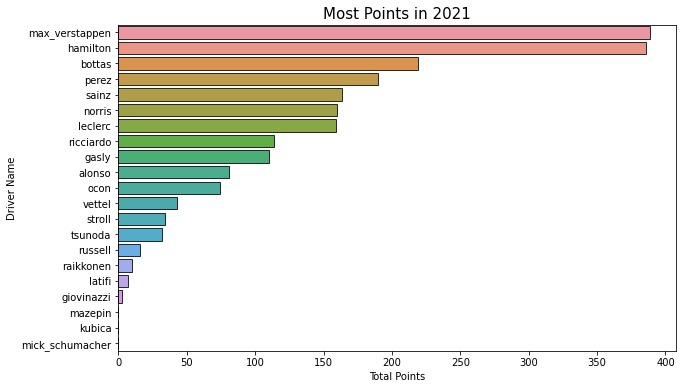

In [41]:
sns.barplot(data = most_points, y = 'driverRef', x = 'points', linewidth = 0.8, edgecolor = 'black')
plt.title('Most Points in 2021', size = 15)
plt.xlabel('Total Points')
plt.ylabel('Driver Name')

In [42]:
# most points by constructors in 2021

most_points_cons = GP_2021_df.groupby('constructor_name')['points'].sum().reset_index().sort_values('points', ascending = False)

Text(0, 0.5, 'Constructor Name')

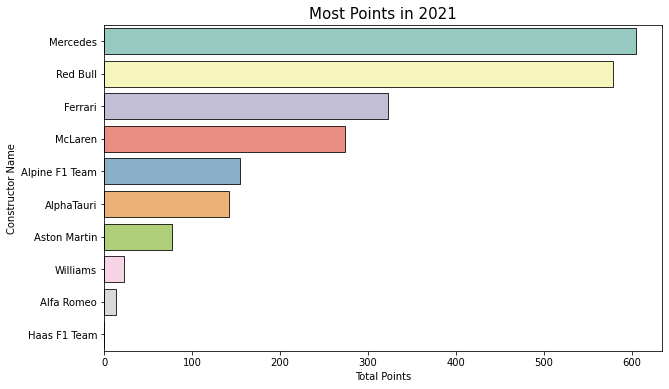

In [43]:
sns.barplot(data = most_points_cons, y = 'constructor_name', x = 'points', linewidth = 0.8, edgecolor = 'black')
plt.title('Most Points in 2021', size = 15)
plt.xlabel('Total Points')
plt.ylabel('Constructor Name')

In [44]:
# most fastest laps by drivers in 2021

filt = GP_2021_df['fastest_lap_rank'] == 1
fastest_laps = GP_2021_df.loc[filt].groupby('driverRef').size().reset_index().rename(columns = {0 : 'No of Fastest Laps'}).sort_values('No of Fastest Laps', ascending = False)

Text(0.5, 1.0, 'Most Fastest Laps in 2021')

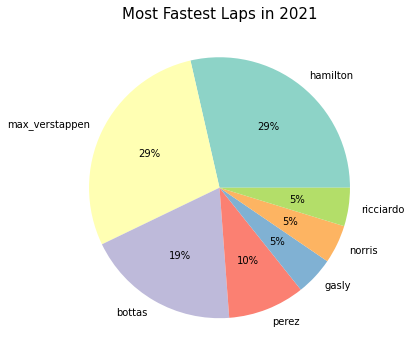

In [45]:
plt.pie(fastest_laps['No of Fastest Laps'], labels = fastest_laps['driverRef'], autopct='%.0f%%')
plt.title('Most Fastest Laps in 2021', size = 15)
